In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# the line above is necessary for getting 
# your plot embedded within the notebook
%matplotlib inline

dset = xr.open_dataset('/chinook/dallmann/Ob_data/ELI_Bins/pr_nino_strong_obs_anomDJFmean.nc')
print(dset)

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, year: 1)
Coordinates:
  * year     (year) float64 1.983e+03
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
Data variables:
    precip   (year, lat, lon) float32 ...


In [2]:
# Take the average of the time for the respective ENSO Bin. Comment out the code when not using the mean of the file
dset = dset.mean('year')
dset

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300)
Coordinates:
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
Data variables:
    precip   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [3]:
pr = dset['precip']

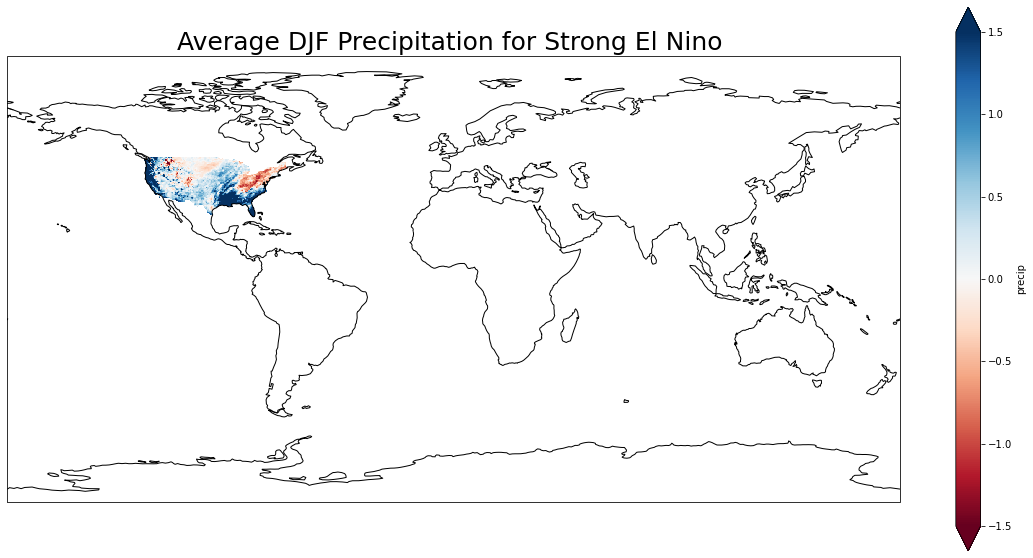

In [4]:
## The projection keyword determines how the plot will look
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

color_map = plt.cm.get_cmap('RdBu')
reversed_color_map = color_map.reversed()


# Use when looking at a specfic year
#pr.isel(year=0).plot(cmap= reversed_color_map, vmin=-3, vmax=3)
#plt.title('DJF Temp in 1957 for Strong El Nino ', size='25')

# Use when looking at the average of a file
pr.plot(cmap='RdBu', vmin=-1.5, vmax=1.5)
plt.title('Average DJF Precipitation for Strong El Nino ', size='25')



#ax.contourf(lon, lat, precip)  # didn't use transform, but looks ok...
plt.show()